In [1]:
directories = ["Web Scholar PDFs", "Data/About Scottie", "Data/Buggy News", "Data/history_of_cmu", "Data/history_of_scs", "Data/Kiltie Band", "Data/lti_faculty", "Data/lti_programs", "Data/Tartan Facts"]

In [41]:
questions = []
answers = []
question_type = {}


for i in directories:
    f = open(i + "/annotation.txt")
    annotations = f.readlines()
    
    q = [i[3:].strip() for i in annotations[0::5]]
    a = [i[3:].strip() for i in annotations[1::5]]
    t = [i[3:].strip() for i in annotations[3::5]]
    print(t)

    for j in t:
        if int(j) in question_type: 
            question_type[int(j)] += 1
        else:
            question_type[int(j)] = 1

    print(len(q), len(a), i)

    questions.extend(q)
    answers.extend(a)
    f.close()

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
65 65 Web Scholar PDFs
['10', '1', '10', '1', '2', '1', '1', '1', '10', '7', '10', '1', '2', '2', '7', '2', '7', '7', '2', '2', '7', '7', '7', '1', '7', '2']
26 26 Data/About Scottie
['7', '7', '7', '7', '1', '2', '7', '7', '7', '2', '1', '7', '2', '2', '7', '7', '6', '10', '7', '2', '1', '1', '1', '2']
24 24 Data/Buggy News
['1', '1', '1', '1', '1', '1', '1', '10', '2', '2', '1', '1', '7', '2', '1', '1', '8', '2', '2', '2', '2', '2', '10', '1', '2', '7', '1', '2', '2', '10', '2', '1', '2', '10', '10', '10', '1', '10', '1', '10', '1', '2', '2', '10', '7', '10', '1', '2', '1', '10', '1', '2', '1', '2', '1', '2', '2', '10', '1', '6', '10', '1', '1', '1', '6', '1', '7'

In [3]:
len(questions), len(answers)

(394, 394)

In [39]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(questions, answers, test_size=0.2)

In [41]:
X_train

['What is required from students for the capstone project in the MSAII program?',
 'What was the purpose of the Andrew Project at CMU?',
 'Is Entropy the publication venue for 3D Semantic Segmentation in the Wild: Learning Generalized Models for Adverse-Condition Point Clouds',
 "Why was the Scottish Terrier chosen as Carnegie Mellon University's mascot?",
 'What was the original name of the Carnegie Institute of Technology?',
 'Was PaLM: Scaling Language Models with Pathways published?',
 "How does the Scottish Terrier's temperament reflect on Carnegie Mellon University's ethos?",
 'How did CMU become the best-wired campus in the world?',
 'What courses are offered in the first year of the MLT program?',
 'What was the significance of the first U.S. drama degree awarded at Carnegie Tech?',
 'What is your opinion on the lasting impact of emoticons, introduced by CMU in 1982?',
 'What is the mailing address for Carnegie Mellon University?',
 'How did the Carnegie Mellon community partic

In [31]:
import os

os.mkdir("SubmissionData")
os.mkdir("SubmissionData/test")
os.mkdir("SubmissionData/train")

In [43]:
def writeListToFile(filename, l):
    f = open(filename, "w")
    for i in l:
        f.write(i + "\n")
    f.close()


writeListToFile("SubmissionData/test/questions.txt", X_test)
writeListToFile("SubmissionData/test/reference_answers.txt", y_test)
writeListToFile("SubmissionData/train/questions.txt", X_train)
writeListToFile("SubmissionData/train/reference_answers.txt", y_train)



10


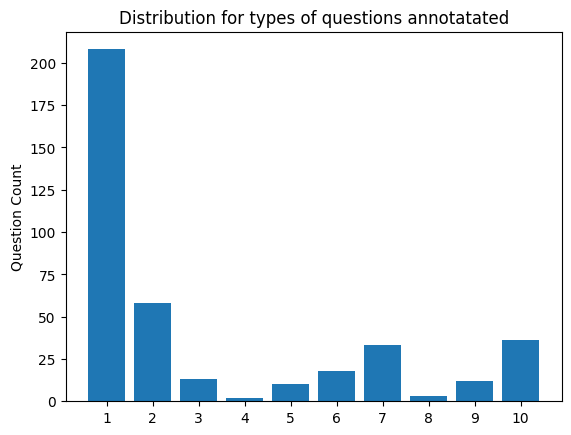

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sorted_types = sorted(question_type.items(), key=lambda item: item[0])
del sorted_types[0]

types = [str(i[0]) for i in sorted_types]
counts =  [i[1] for i in sorted_types]
print(len(counts))
bar_colors = colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'lime', 'teal', 'pink']
ax.bar(types, counts)

ax.set_ylabel('Question Count')
ax.set_title('Distribution for types of questions annotatated')
plt.show()